# Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns


# Procedimientos y Proyectos


Considere los siguientes pseudo algoritmos para generar un proceso de Poisson
de tasa $\lambda$ en un intervalo [0,t]:



1. Procedimiento 1:
    1. Simule N como una v.a. de Poisson de parámetro $\lambda t$,
    2. Luego, si N = n simule n v.a. uniformes en el intervalo [0,t], sean estas v.a. $U_1,...,U_n$,
    3. Luego ordene  $U_1,...,U_n$ de más pequeña a más grande, llame a esta versión ordenada  $S_1,...,S_n$.
    4. Entregar $S_1,...,S_n$.

Este procedimiento genera todos los eventos de un proceso de Poisson que ocurren en el intervalo [0,t].

In [2]:
def procedimiento_1(λ=1,t=10):
    N = np.random.poisson(lam=λ*t)  # argumento de la poisson(lam,size = 1)
    U = np.random.uniform(0,t,N)    # argumento de la uniforme(start,end,length)
    S = np.sort(U)                  # ordeno el vector U
    return S

In [3]:
procedimiento_1()

array([0.24441673, 0.58403067, 1.51215986, 1.64983266, 3.67278535,
       4.56251424, 4.61685322, 6.5745949 , 7.70163324, 8.805707  ,
       9.29968482, 9.37627118, 9.88885655])

## Proyecto 1 : Tiempo entre eventos exponencial

1. Procedimiento a simular 1
2. v.a. a analizar: Tiempos entre eventos
3. Distribución de Referencia: exponencial
4. Test estadístico básico: Media y Varianza

Cuantos datos estoy generando:  128


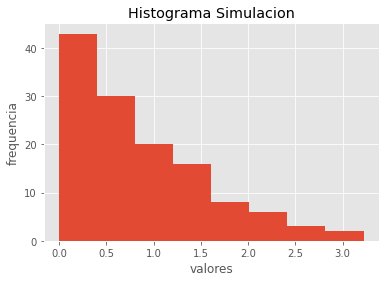

In [4]:
λ = 1.2
t = 112
X = procedimiento_1(λ=λ,t=t)

# del procedimiento 1 obtenemos los tiempos entre enventos t_{i} -t_{i-1}

Y = np.zeros(len(X)) # Tiempo entre eventos
Y[0] = X[0]

for i in range(1,len(X)):
    Y[i] = X[i] - X[i-1]


print("Cuantos datos estoy generando: ",len(Y))
plt.style.use('ggplot')
plt.hist(x=Y, bins='auto');
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Simulacion")
plt.show()

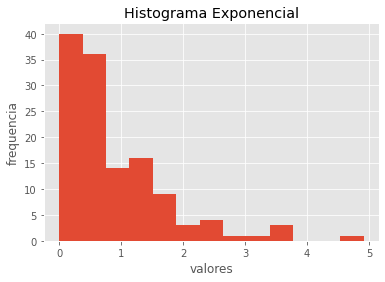

In [5]:
Yref = np.random.exponential(scale=1/λ,size=len(Y)); # genero size v.a exponencial
plt.hist(x=Yref, bins='auto');
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Exponencial")
plt.show()

/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


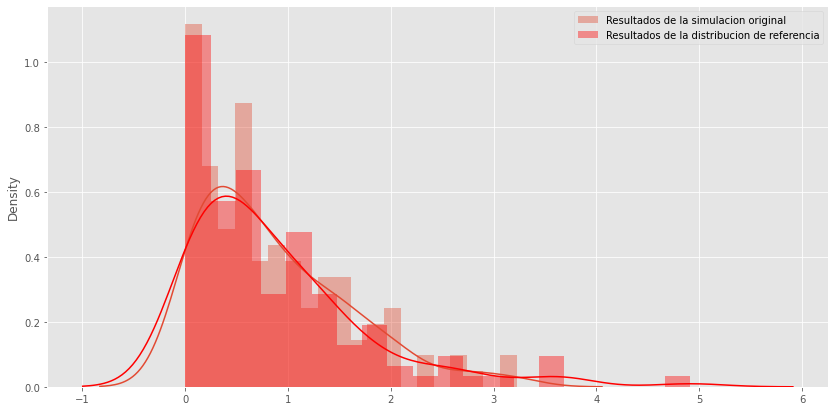

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(Y, bins=20, label='Resultados de la simulacion original')
ax = sns.distplot(Yref, bins=20, label='Resultados de la distribucion de referencia', color='red')
plt.legend()

In [11]:
# test estadistico media y varianza

print("Media de la muestra, de los tiempos entre llegadas: ",np.mean(Y))
print("Media teorica: ",1/λ)

print("Varianza de la muestra, de los tiempos entre llegadas: ",np.var(Y))
print("Varianza teorica: ",1/(λ**2))


Media de la muestra, de los tiempos entre llegadas:  0.864023684404961
Media teorica:  0.8333333333333334
Varianza de la muestra, de los tiempos entre llegadas:  0.5301152943522114
Varianza teorica:  0.6944444444444444


2. Procedimiento 2:
    1. Simule $T_1$ una v.a. exponencial sea i = 1 y $S_1 = T_1$,
    2. Luego, mientras $S_i < t$ repetir
        1. i := i + 1
        2. simular $T_i$ como una v.a. exponencial de parámetro $\lambda$,
        3. $S_i = S_{i-1} + T_i$
    3. luego n = i - 1
    4. entregar $S_1,...,S_n$ (todos los eventos que ocurrieron en el intervalo [0,t]).

In [12]:
def procedimiento_2(λ=1,t=10):
    T = [np.random.exponential(scale=1/λ)]  # genero una variable aleatoria exponencial de parametro λ
    S = [T[0]]                              # Guardo el primero evento
    i = 0
    while(S[i]<t):
        i=i+1
        T.append(np.random.exponential(scale=1/λ)) # genero una variable aleatoria exponencial de parametro λ
        S.append(sum(T))                           # guardo el i-esimo evento
    return np.array(S[:-1])                        # devuelvo los n-1 eventos

In [14]:
procedimiento_2()

array([0.99890741, 1.20737912, 1.70900634, 1.80386063, 2.09992815,
       6.49158615, 6.94829646, 7.61224231, 7.6511735 , 8.56829551,
       8.70522555])

## Proyecto 2: Conteo en un intérvalo

1. Procedimiento a simular 2
2. v.a. a analizar: Núm. de evento en intervalos de largo t/100
3. Distribución de Referencia: Distribución de Poisson
4. Test estadístico básico: Media y Varianza

Cuantos datos estoy generando:  100


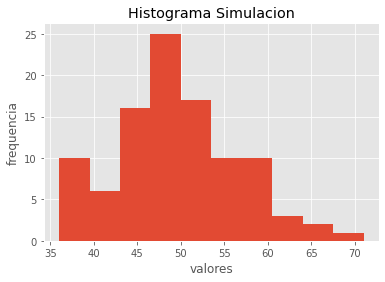

In [54]:
λ = 5
t = 1000
X = procedimiento_2(λ=λ,t=t)

Y, edges, _ = ss.binned_statistic(X,X,statistic="count",bins=100,range=(0,t))

print("Cuantos datos estoy generando: ",len(Y))

fig, ax = plt.subplots(1, 1)

# histograma
aleatorios = Y # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, bins="auto")
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Simulacion")
plt.show()

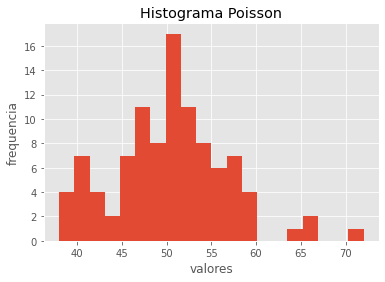

In [55]:
# histograma
aleatorios1 = np.random.poisson(λ*t/100,len(Y)) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios1, 20)
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Poisson")
plt.show()

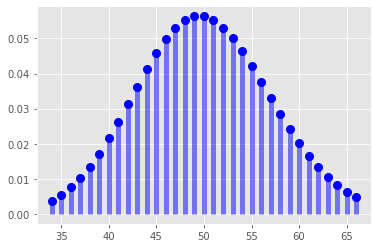

In [56]:
# Funcion de densidad de probabilidad

fig, ax = plt.subplots(1, 1)
Yref = np.arange(ss.poisson.ppf(0.01,λ*t/100), ss.poisson.ppf(0.99,λ*t/100))
ax.plot(Yref, ss.poisson.pmf(Yref, λ*t/100), 'bo', ms=8, label='poisson pmf')
ax.vlines(Yref, 0, ss.poisson.pmf(Yref, λ*t/100), colors='b', lw=5, alpha=0.5)

/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


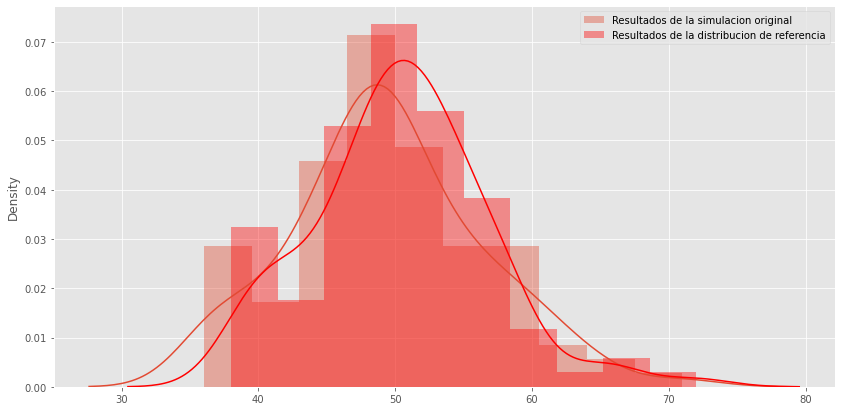

In [57]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(aleatorios, bins=10, label='Resultados de la simulacion original')
ax = sns.distplot(aleatorios1, bins=10, label='Resultados de la distribucion de referencia', color='red')
plt.legend()

In [58]:
# test estadistico media y varianza

print("Media de la muestra, de la pseudo random variable poisson: ",np.mean(Y))
print("Media teorica: ",λ*t/100)

print("Varianza de la muestra, de los tiempos entre llegadas: ",np.var(Y))
print("Varianza teorica: ",λ*t/100)


Media de la muestra, de la pseudo random variable poisson:  49.39
Media teorica:  50.0
Varianza de la muestra, de los tiempos entre llegadas:  48.6779
Varianza teorica:  50.0


# Procedimiento y Proyecto Bernoulli (Prueba)

3. Procedimiento 3:
    1. Simule $K := t/\Delta$ v.a. Bernoulli todas de parámetro p llámelas $X_1,...,X_K$,
    2. Sea $n = \sum_{i=1}^K X_i$ el número de eventos que ocurrieron en los K intervalos de tiempo,
    3. Sean $k(1),...,k(n)$ todos los indices de las v.a. Bernoulli que valen 1. Es decir, $X_{k(1)} = 1,...,X_{k(n)} = 1$ (por ejemplo $X_{k(1)}$ es la primera v.a. Bernoulli que vale 1)
    4. Sean $S_1,...,S_n$ los instantes de tiempo en que ocurren los eventos, entonces para todo i se tiene que $S_1 = k(1)\Delta,...,S_n = k(n)\Delta$
    5. Entregar $S_1,...,S_n$.

In [63]:
def procedimiento_3(Δ=1,p=0.5,t=100):
    K = int(t/Δ)   # calculo de K
    X = np.random.binomial(1,p,K)                     # La bernoulli es un caso particular de la binomial(1,p).
    n = sum(X)                                        # El numero de eventos que ocurrieron en los K intervalos de tiempo.
    index = np.argwhere(np.array(X) == 1) + 1           # obtengo los indices de la v.a. bernoulli que vale 1.
    S = [index[i][0]*Δ for i in range(len(index))]    # Para todos los indices se multiplica por el slot de tiempo.
    return np.array(S)

In [66]:
procedimiento_3()

array([ 3,  5,  6,  7, 10, 11, 13, 16, 17, 21, 23, 24, 28, 29, 30, 31, 32,
       33, 35, 36, 38, 39, 41, 43, 46, 48, 51, 54, 58, 60, 61, 63, 64, 65,
       66, 69, 71, 72, 74, 76, 79, 80, 83, 86, 89, 90, 92, 95, 96])

## Proyecto Prueba

1. Procedimiento a simular 3
2. v.a. a analizar: Tiempos entre eventos
3. Distribución de Referencia: exponencial
4. Test estadístico básico: Media y Varianza

Cuantos datos estoy generando:  1046


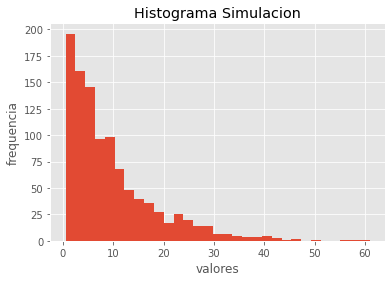

In [67]:
Δ = 0.5
p = 0.05
t = 10000
X = procedimiento_3(Δ=Δ,p=p,t=t)

# del procedimiento 3 obtenemos los tiempos entre enventos S_{i} - S_{i-1}

Y = np.zeros(len(X))
Y[0] = X[0]

for i in range(1,len(X)):
    Y[i] = X[i] - X[i-1]


print("Cuantos datos estoy generando: ",len(Y))
plt.style.use('ggplot')
plt.hist(x=Y, bins='auto');
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Simulacion")
plt.show()

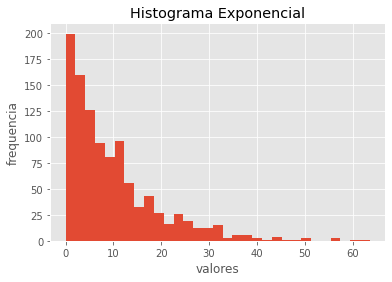

In [72]:
Yref = np.random.exponential(scale=np.mean(Y),size=len(Y)); # genero size v.a exponencial
plt.hist(x=Yref, bins='auto');
plt.ylabel("frequencia")
plt.xlabel("valores")
plt.title("Histograma Exponencial")
plt.show()

/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegulio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


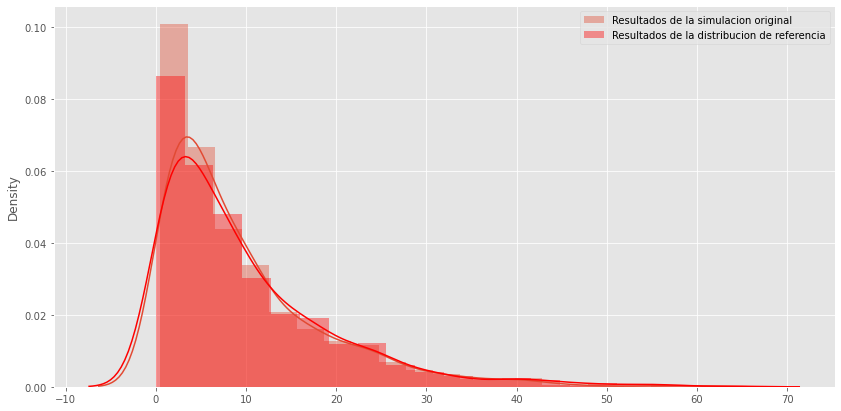

In [69]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(Y, bins=20, label='Resultados de la simulacion original')
ax = sns.distplot(Yref, bins=20, label='Resultados de la distribucion de referencia', color='red')
plt.legend()

In [78]:
print("Media de la muestra, de los tiempos entre llegadas: ",np.mean(Y))
print("Media teorica: ",np.random.exponential(scale=np.mean(Y),size=len(Y)).mean())

print("Varianza de la muestra, de los tiempos entre llegadas: ",np.var(Y))
print("Varianza teorica: ",np.var(np.random.exponential(scale=np.mean(Y),size=len(Y))))


Media de la muestra, de los tiempos entre llegadas:  9.553537284894837
Media teorica:  9.978165215743749
Varianza de la muestra, de los tiempos entre llegadas:  83.23470546084691
Varianza teorica:  82.57843091866307


9.171334857006194